# Predicción de precios de viviendas - Linear Regression
### Estudiante: Rebeca Justiniano Saravia

Dado un dataset con:

- m² construidos
- número de habitaciones
- antigüedad de la vivienda
- precio

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('datasets/dataset_regresion_lineal.csv')
data.head()

,m2_construidos,habitaciones,antiguedad,precio
0,80,3,10,55000
1,120,4,5,90000
2,60,2,20,40000
3,150,4,7,110000
4,200,5,3,150000


In [3]:
x = data[['m2_construidos', 'habitaciones', 'antiguedad']]
y = data['precio']

## 1. Normalizar los datos

In [4]:
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)
x_normalized

array([[0.14285714, 0.33333333, 0.41176471],
       [0.42857143, 0.66666667, 0.11764706],
       [0.        , 0.        , 1.        ],
       [0.64285714, 0.66666667, 0.23529412],
       [1.        , 1.        , 0.        ],
       [0.21428571, 0.33333333, 0.70588235],
       [0.35714286, 0.33333333, 0.52941176],
       [0.5       , 0.66666667, 0.17647059]])

## 2. Dividir en entrenamiento y prueba 

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

## 3. Ajustar un modelo de regresión lineal múltiple

In [21]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

## 4. Graficar valor real vs valor predicho

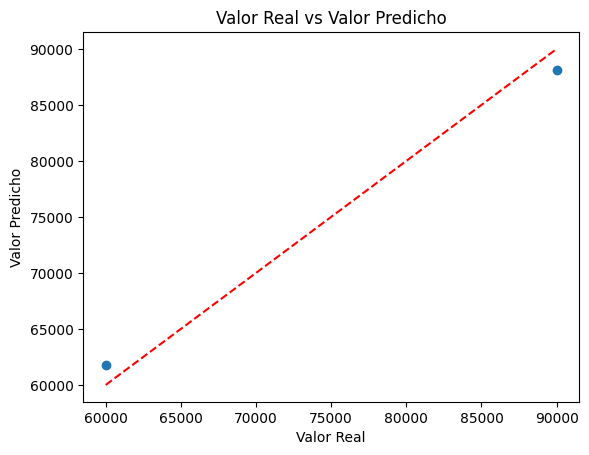

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Valor Real vs Valor Predicho")

# Línea diagonal ideal (perfecta predicción)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.show()


## 5. Calcular RSME y MAE

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')


Root Mean Squared Error: 1803.2630720082377
Mean Absolute Error: 1802.325581395351


## 6. Interpretar los coeficientes

In [24]:
coeficientes = pd.DataFrame({
    'Variable': x.columns,
    'Coeficiente': model.coef_
})

print(coeficientes)


         Variable    Coeficiente
0  m2_construidos  123720.930233
1    habitaciones  -30000.000000
2      antiguedad  -16802.325581


- podemos deducir que lo que mas influye en el precio de una casa o vivienda son los m2 contruidos, ya que tiene un valor positivo muy alto, indicando que por cada m2 construidos el precio sube 123.720 dolares o en la moneda que se esté manejando.
- En cuanto el numero de habitaciones, tiene un numero negativo, lo que indicaría que si hay mas habitaciones, el precio baja, este resultado se debe al tamaño del dataset que no es muy grande y no da mayor variabilidad para hacer una buena predicción, por lo que causa esta anomalía, ya que lo normal es que el precio de la casa suba a mayor número de habitaciones.
- En cuanto a la antiguedad, podemos interpretar que mientras mas antigua sea la casa, mas bajo es su precio, restando el precio a 16.802$.